In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import folium
!pip install folium
!pip install shapely
!pip install scipy
!pip install plotly
!pip install ace_tools
from folium import Icon
from folium import Map
from folium import Marker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
Data_path = ("/content/Crime_Data_from_2020_to_Present (1).csv")
df = pd.read_csv(Data_path)

In [ ]:
# df.head()

In [ ]:
# df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516410 entries, 0 to 516409
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           516410 non-null  int64  
 1   Date Rptd       516410 non-null  object 
 2   DATE OCC        516409 non-null  object 
 3   TIME OCC        516409 non-null  float64
 4   AREA            516409 non-null  float64
 5   AREA NAME       516409 non-null  object 
 6   Rpt Dist No     516409 non-null  float64
 7   Part 1-2        516409 non-null  float64
 8   Crm Cd          516409 non-null  float64
 9   Crm Cd Desc     516409 non-null  object 
 10  Mocodes         445298 non-null  object 
 11  Vict Age        516409 non-null  float64
 12  Vict Sex        448748 non-null  object 
 13  Vict Descent    448744 non-null  object 
 14  Premis Cd       516402 non-null  float64
 15  Premis Desc     516180 non-null  object 
 16  Weapon Used Cd  182400 non-null  float64
 17  Weapon Des

In [ ]:
# df.isnull()

In [ ]:
df.dropna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
52073,200613424,08/02/2020 12:00:00 AM,08/02/2020 12:00:00 AM,2030.0,6.0,Hollywood,657.0,1.0,761.0,BRANDISH WEAPON,...,AO,Adult Other,761.0,920.0,930.0,998.0,WESTERN,ROMAINE,34.0885,-118.3092
126178,201904032,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2135.0,19.0,Mission,1924.0,1.0,761.0,BRANDISH WEAPON,...,AA,Adult Arrest,761.0,930.0,997.0,998.0,ASTORIA ST,SAN FERNANDO RD,34.2949,-118.4571
362903,210617136,10/08/2021 12:00:00 AM,10/07/2021 12:00:00 AM,1950.0,6.0,Hollywood,659.0,1.0,121.0,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,210.0,910.0,998.0,NORMANDIE,DE LONGPRE,34.0966,-118.3005
371644,210209196,05/08/2021 12:00:00 AM,05/08/2021 12:00:00 AM,230.0,2.0,Rampart,279.0,1.0,210.0,ROBBERY,...,AO,Adult Other,210.0,510.0,910.0,998.0,JAMES M WOOD,GREEN,34.0503,-118.2720
489087,220600626,04/27/2022 12:00:00 AM,04/23/2022 12:00:00 AM,2300.0,6.0,Hollywood,646.0,1.0,821.0,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,IC,Invest Cont,230.0,821.0,910.0,998.0,SELMA,LAS PALMAS,34.0997,-118.3363


In [ ]:
df.fillna(0)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230.0,3.0,Southwest,377.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,0.0,0.0,0.0,1100 W 39TH PL,0,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330.0,1.0,Central,163.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,0.0,0.0,0.0,700 S HILL ST,0,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200.0,1.0,Central,155.0,2.0,845.0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,0.0,0.0,0.0,200 E 6TH ST,0,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730.0,15.0,N Hollywood,1543.0,2.0,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,0.0,0.0,5400 CORTEEN PL,0,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415.0,19.0,Mission,1998.0,2.0,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,0.0,0.0,0.0,14400 TITUS ST,0,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516405,221212600,05/27/2022 12:00:00 AM,05/27/2022 12:00:00 AM,230.0,12.0,77th Street,1243.0,1.0,510.0,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,0.0,0.0,0.0,2000 W 65TH ST,0,33.9806,-118.3134
516406,221406167,02/15/2022 12:00:00 AM,02/11/2022 12:00:00 AM,845.0,14.0,Pacific,1435.0,1.0,420.0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,0.0,0.0,0.0,11300 VICTORIA AV,0,34.0131,-118.4211
516407,220319015,10/24/2022 12:00:00 AM,10/24/2022 12:00:00 AM,700.0,3.0,Southwest,316.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,0.0,0.0,0.0,1800 W 24TH ST,0,34.0346,-118.3033
516408,221100666,04/16/2022 12:00:00 AM,04/15/2022 12:00:00 AM,1413.0,11.0,Northeast,1145.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,998.0,0.0,0.0,2600 LOCKSLEY PL,0,34.1054,-118.2586


In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

In [ ]:
# df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230.0,3.0,Southwest,377.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330.0,1.0,Central,163.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200.0,1.0,Central,155.0,2.0,845.0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730.0,15.0,N Hollywood,1543.0,2.0,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415.0,19.0,Mission,1998.0,2.0,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [ ]:
# df.duplicated()

In [ ]:
# df.isna()

In [ ]:
df.fillna(0)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230.0,3.0,Southwest,377.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,0.0,0.0,0.0,1100 W 39TH PL,0,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330.0,1.0,Central,163.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,0.0,0.0,0.0,700 S HILL ST,0,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200.0,1.0,Central,155.0,2.0,845.0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,0.0,0.0,0.0,200 E 6TH ST,0,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730.0,15.0,N Hollywood,1543.0,2.0,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,0.0,0.0,5400 CORTEEN PL,0,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415.0,19.0,Mission,1998.0,2.0,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,0.0,0.0,0.0,14400 TITUS ST,0,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516405,221212600,05/27/2022 12:00:00 AM,05/27/2022 12:00:00 AM,230.0,12.0,77th Street,1243.0,1.0,510.0,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,0.0,0.0,0.0,2000 W 65TH ST,0,33.9806,-118.3134
516406,221406167,02/15/2022 12:00:00 AM,02/11/2022 12:00:00 AM,845.0,14.0,Pacific,1435.0,1.0,420.0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,0.0,0.0,0.0,11300 VICTORIA AV,0,34.0131,-118.4211
516407,220319015,10/24/2022 12:00:00 AM,10/24/2022 12:00:00 AM,700.0,3.0,Southwest,316.0,1.0,510.0,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,0.0,0.0,0.0,1800 W 24TH ST,0,34.0346,-118.3033
516408,221100666,04/16/2022 12:00:00 AM,04/15/2022 12:00:00 AM,1413.0,11.0,Northeast,1145.0,2.0,624.0,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,998.0,0.0,0.0,2600 LOCKSLEY PL,0,34.1054,-118.2586


In [ ]:
df.dropna()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
52073,200613424,08/02/2020 12:00:00 AM,08/02/2020 12:00:00 AM,2030.0,6.0,Hollywood,657.0,1.0,761.0,BRANDISH WEAPON,...,AO,Adult Other,761.0,920.0,930.0,998.0,WESTERN,ROMAINE,34.0885,-118.3092
126178,201904032,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2135.0,19.0,Mission,1924.0,1.0,761.0,BRANDISH WEAPON,...,AA,Adult Arrest,761.0,930.0,997.0,998.0,ASTORIA ST,SAN FERNANDO RD,34.2949,-118.4571
362903,210617136,10/08/2021 12:00:00 AM,10/07/2021 12:00:00 AM,1950.0,6.0,Hollywood,659.0,1.0,121.0,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,210.0,910.0,998.0,NORMANDIE,DE LONGPRE,34.0966,-118.3005
371644,210209196,05/08/2021 12:00:00 AM,05/08/2021 12:00:00 AM,230.0,2.0,Rampart,279.0,1.0,210.0,ROBBERY,...,AO,Adult Other,210.0,510.0,910.0,998.0,JAMES M WOOD,GREEN,34.0503,-118.2720
489087,220600626,04/27/2022 12:00:00 AM,04/23/2022 12:00:00 AM,2300.0,6.0,Hollywood,646.0,1.0,821.0,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,IC,Invest Cont,230.0,821.0,910.0,998.0,SELMA,LAS PALMAS,34.0997,-118.3363


In [ ]:
df['Mocodes'].fillna('Unknown', inplace=True)
df['Vict Sex'].fillna('Unknown', inplace=True)
df['Vict Descent'].fillna('Unknown', inplace=True)
df['Premis Cd'].fillna('Unknown', inplace=True)
df['Premis Desc'].fillna('Unknown', inplace=True)
df['Weapon Used Cd'].fillna('No Weapon', inplace=True)
df['Weapon Desc'].fillna('No Weapon', inplace=True)
df.dropna(subset=['Status'], inplace=True)
df.dropna(subset=['Crm Cd 1'], inplace=True)
df['Cross Street'].fillna('Unknown', inplace=True)

df.isnull().sum()

<ipython-input-11-b393e3944591>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mocodes'].fillna('Unknown', inplace=True)
<ipython-input-11-b393e3944591>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [ ]:
columns_to_drop = [
    'DR_NO', 'Rpt Dist No', 'Part 1-2', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4',
    'Cross Street', 'Status', 'TIME OCC'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the drop
df.head()

,Date Rptd,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,3.0,Southwest,624.0,BATTERY - SIMPLE ASSAULT,0444 0913,36.0,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1.0,Central,624.0,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25.0,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1.0,Central,845.0,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0.0,X,X,726.0,POLICE FACILITY,No Weapon,No Weapon,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,15.0,N Hollywood,745.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No Weapon,No Weapon,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,19.0,Mission,740.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31.0,X,X,409.0,BEAUTY SUPPLY STORE,No Weapon,No Weapon,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [ ]:
# df.to_csv('cleaned_data.csv', index=False)

In [ ]:
# df2 = pd.read_csv("/kaggle/working/cleaned_data.csv")

df2 =df
df2.describe()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516402 entries, 0 to 516408
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       516402 non-null  object 
 1   DATE OCC        516402 non-null  object 
 2   AREA            516402 non-null  float64
 3   AREA NAME       516402 non-null  object 
 4   Crm Cd          516402 non-null  float64
 5   Crm Cd Desc     516402 non-null  object 
 6   Mocodes         516402 non-null  object 
 7   Vict Age        516402 non-null  float64
 8   Vict Sex        516402 non-null  object 
 9   Vict Descent    516402 non-null  object 
 10  Premis Cd       516402 non-null  object 
 11  Premis Desc     516402 non-null  object 
 12  Weapon Used Cd  516402 non-null  object 
 13  Weapon Desc     516402 non-null  object 
 14  Status Desc     516402 non-null  object 
 15  LOCATION        516402 non-null  object 
 16  LAT             516402 non-null  float64
 17  LON            

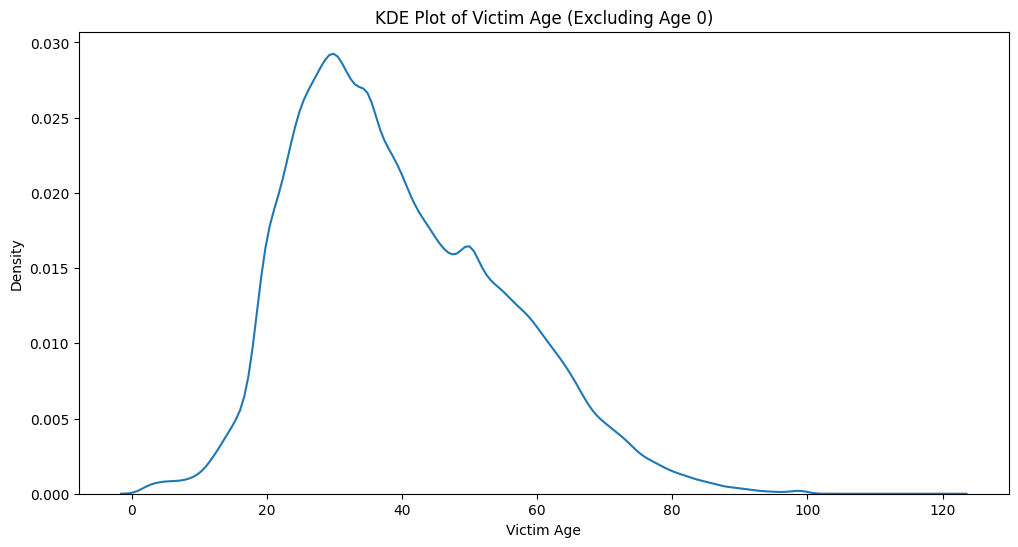

In [ ]:
# df = pd.read_csv("/kaggle/working/cleaned_data.csv", low_memory=False)
# Drop ages = 0 to filter out unknowns
filtered_data = df[df['Vict Age'] > 0]

# Plotting KDE for Victim Age
plt.figure(figsize=(12, 6))
sns.kdeplot(data=filtered_data, x='Vict Age')
plt.title('KDE Plot of Victim Age (Excluding Age 0)')
plt.xlabel('Victim Age')
plt.ylabel('Density')
plt.show()

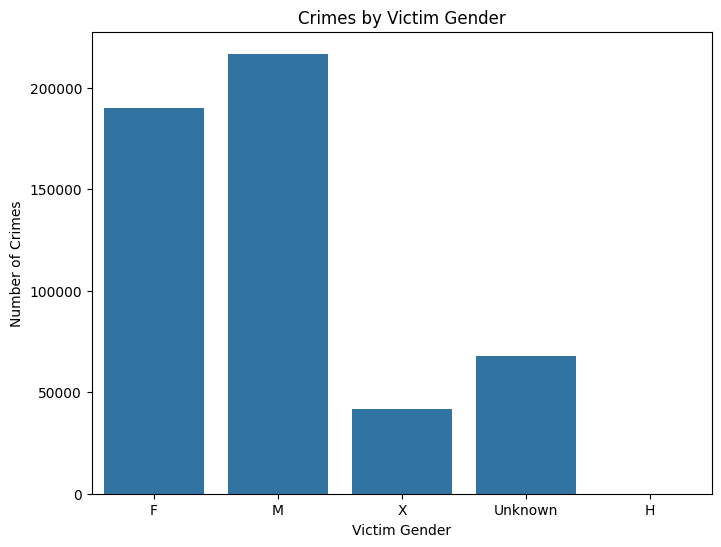

In [ ]:
# Drop rows with NaN in 'Vict Sex'
filtered_data_gender = df.dropna(subset=['Vict Sex'])

# Plot Crimes by Victim Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Vict Sex', data=filtered_data_gender)
plt.title('Crimes by Victim Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Crimes')
plt.show()

<ipython-input-16-6981782fec96>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


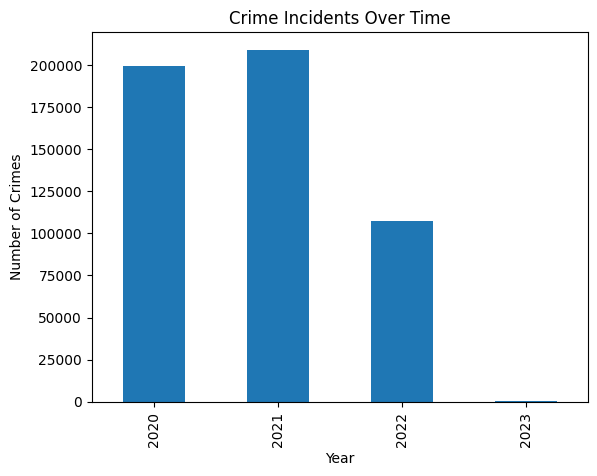

In [ ]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Group by year and count the number of crimes
df['DATE OCC'].groupby(df['DATE OCC'].dt.year).count().plot(kind='bar')

# Adding labels and title
plt.title('Crime Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

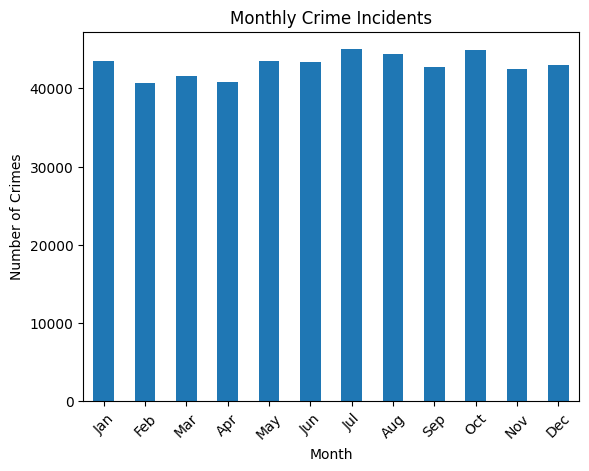

In [ ]:
# Group by month and count crime incidents for years before 2023
df[df['DATE OCC'].dt.year < 2023]['DATE OCC'].groupby(df['DATE OCC'].dt.month).count().plot(kind='bar')
plt.title('Monthly Crime Incidents')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

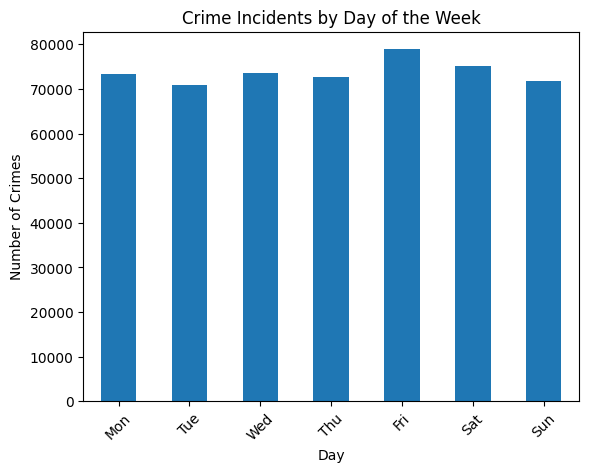

In [ ]:
# Group by day of the week and count crime incidents
df['DATE OCC'].groupby(df['DATE OCC'].dt.dayofweek).count().plot(kind='bar')
plt.title('Crime Incidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(7), labels=[
    'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

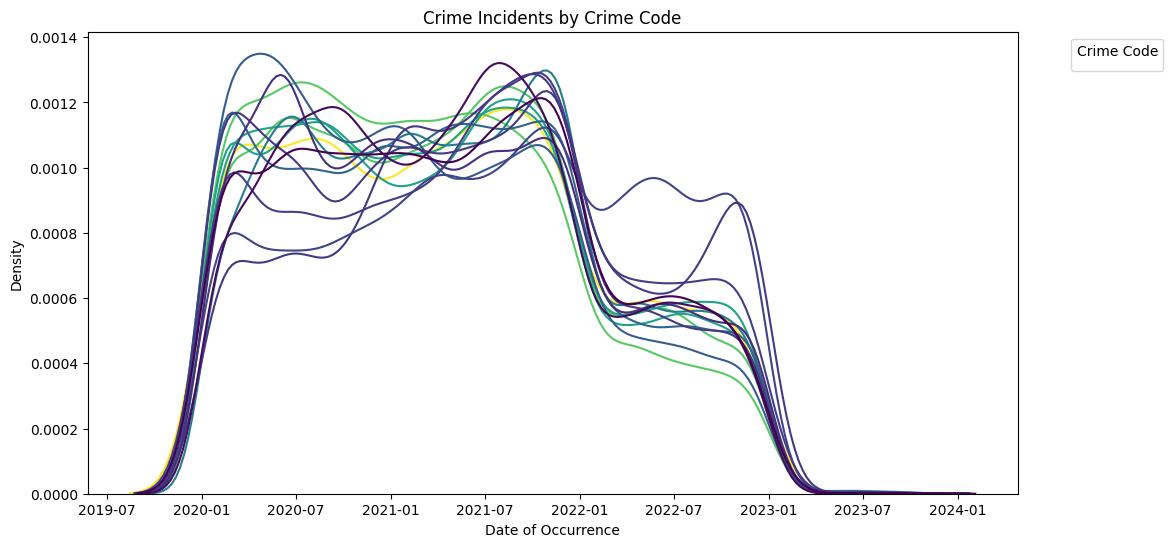

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Crm Cd'].isin(df['Crm Cd'].value_counts().nlargest(15).index)],
         x='DATE OCC', hue='Crm Cd', palette='viridis', common_norm=False)

plt.title('Crime Incidents by Crime Code')
plt.xlabel('Date of Occurrence')
plt.ylabel('Density')
plt.legend(title='Crime Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE with the Y-axis representing the actual number of crimes
sns.kdeplot(df['Vict Age'], weights=[1/len(df)]*len(df), bw_adjust=0.5)
plt.title('Kernel Density Estimate of Victim Age (Number of Crimes)')
plt.ylabel('Number of Crimes')
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `weights`

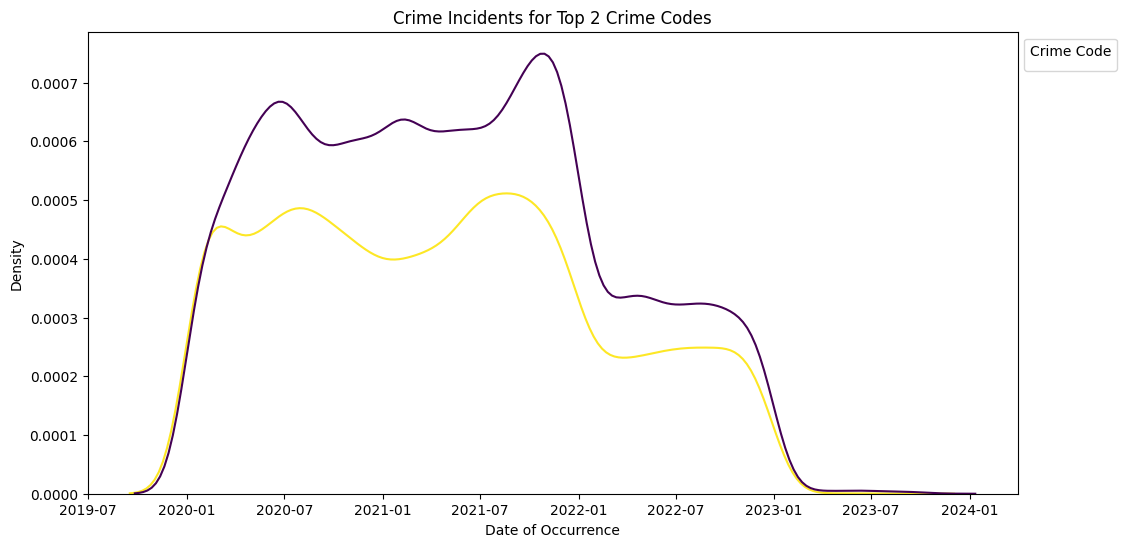

In [ ]:
# KDE plot for the top 2 crime codes
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Crm Cd'].isin(df['Crm Cd'].value_counts().nlargest(2).index)],
         x='DATE OCC', hue='Crm Cd', palette='viridis')

plt.title('Crime Incidents for Top 2 Crime Codes')
plt.xlabel('Date of Occurrence')
plt.ylabel('Density')
plt.legend(title='Crime Code', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

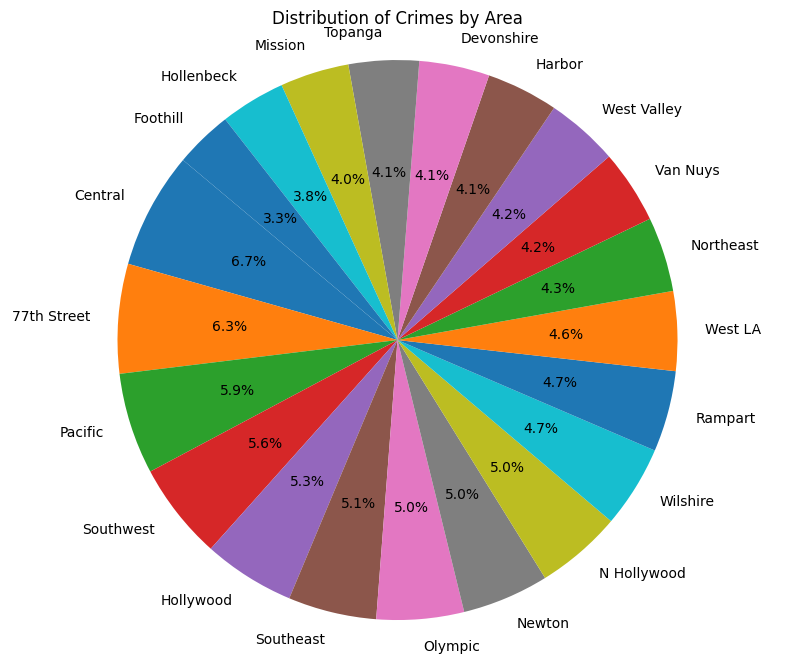

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with all areas and their counts
data = {
    'Area': [
        'Central', '77th Street', 'Pacific', 'Southwest', 'Hollywood',
        'Southeast', 'Olympic', 'Newton', 'N Hollywood', 'Wilshire',
        'Rampart', 'West LA', 'Northeast', 'Van Nuys', 'West Valley',
        'Harbor', 'Devonshire', 'Topanga', 'Mission', 'Hollenbeck',
        'Foothill'
    ],
    'Count': [
        54835, 51553, 47754, 45689, 43268,
        41620, 41148, 40859, 40520, 38685,
        38159, 37425, 35214, 34631, 34141,
        33789, 33127, 33111, 32469, 30650,
        27225
    ]
}

# Create a DataFrame
area_df = pd.DataFrame(data)

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(area_df['Count'], labels=area_df['Area'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crimes by Area')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


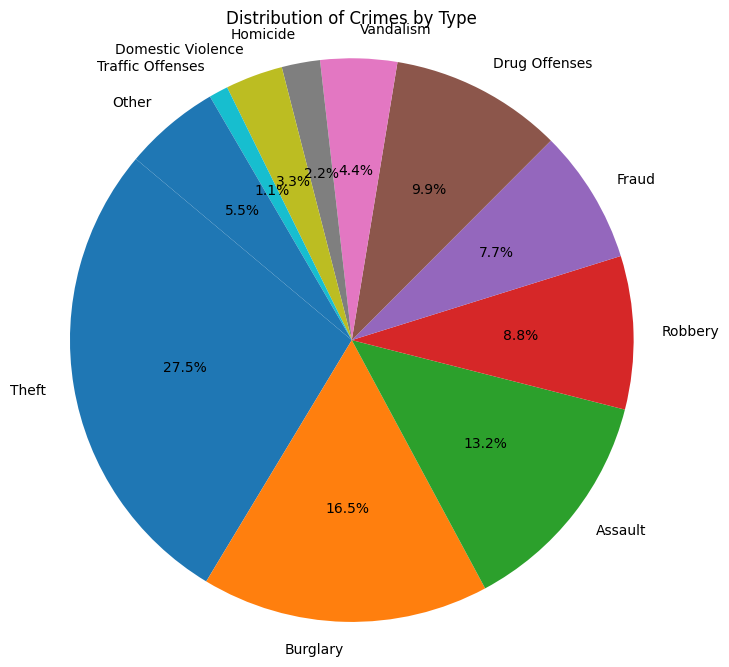

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Sample DataFrame with crime types and their counts
data = {
    'Crime_Type': [
        'Theft', 'Burglary', 'Assault', 'Robbery', 'Fraud',
        'Drug Offenses', 'Vandalism', 'Homicide', 'Domestic Violence',
        'Traffic Offenses', 'Other'
    ],
    'Count': [
        25000, 15000, 12000, 8000, 7000,
        9000, 4000, 2000, 3000,
        1000, 5000
    ]
}

# Create a DataFrame
crime_df = pd.DataFrame(data)

# Plotly Express Pie Chart
fig = px.pie(
    crime_df,
    names='Crime_Type',  # Fixed: Use 'Crime_Type' without spaces
    values='Count',
    title='Distribution of Crimes by Type',
    hole=0.3  # Creates a donut chart
)

# Show the Plotly figure
fig.show()

# Matplotlib Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    crime_df['Count'],
    labels=crime_df['Crime_Type'],  # Fixed: Use 'Crime_Type' without spaces
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Crimes by Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


In [ ]:
# from folium import Icon
# from folium import Map
# from folium import Marker
# import pandas as pd

# sample_size = 1000

# # Assuming df is already defined and loaded with your data
# # We have a limited color map so we loop it to pad it out
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
#           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
#           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
#           'gray', 'black', 'lightgray'] * 7
# code_color_map = dict(zip(tuple(df['Crm Cd'].unique()), tuple(colors)))

# # For some reason we have to fudge the center a little
# lon_fudge = -0.5
# location_map = Map(location=[df['LAT'].mean(), df['LON'].mean() + lon_fudge], zoom_start=10)

# # Sample and create markers
# for index, row in df.sample(sample_size).iterrows():
#     # Modify the popup based on available columns
#     popup = '{}/{}/{}'.format(row['LOCATION'], row['AREA NAME'], row['Crm Cd Desc'])  # Removed 'Status'
#     Marker([row['LAT'], row['LON']], popup=popup,
#            icon=Icon(color=code_color_map[row['Crm Cd']])).add_to(location_map)

# location_map


In [ ]:
# import folium
from folium import Map
from folium.plugins import HeatMap
import pandas as pd

sample_size = 80000  # Specify the sample size for the heatmap

# Ensure 'LAT' and 'LON' are numeric and remove any rows with NaN or zero values
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

# Filter out invalid latitude and longitude values (NaN or zero)
df_clean = df.dropna(subset=['LAT', 'LON'])
df_clean = df_clean[(df_clean['LAT'] != 0) & (df_clean['LON'] != 0)]

# Sample the dataset to the specified size
df_sample = df_clean.sample(n=min(sample_size, len(df_clean)), random_state=42)

# Debug: Check the number of valid data points in the sample
print(f"Number of valid data points for the heatmap: {len(df_sample)}")

# Create a map centered around the average latitude and longitude of the sample
location_map = Map(location=[df_sample['LAT'].mean(), df_sample['LON'].mean()], zoom_start=10)

# Creating HeatMap data (LAT, LON pairs)
heat_data = [[row['LAT'], row['LON']] for index, row in df_sample.iterrows()]

# Add heatmap to the map if there are valid points
if heat_data:
    HeatMap(heat_data).add_to(location_map)
else:
    print("No valid data points for the heatmap.")

# Display the heatmap
location_map


Number of valid data points for the heatmap: 80000
